In this notebook, we will plot the results of the experiments comparing the different
fit strategies for LCEGP in the contextual setting.

This experiment is focused on the setting where we have full observations only (from a
randomly selected arm), to see whether that affects the fit in any way.


In [1]:
import json
import os

import torch
from torch import Tensor

%matplotlib inline
import matplotlib.pyplot as plt

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()


def plot_experiment(
    dirname: str, plot_idcs: list = None, empirical_pcs: bool = False
) -> Tensor:
    exp_dir = os.path.join(current_dir, dirname)
    config_path = os.path.join(exp_dir, "config.json")

    with open(config_path, "r") as f:
        config_dict = json.load(f)
        print(f"Config: \n {json.dumps(config_dict, indent=4)}")

    # get all the output files
    directory_list = os.listdir(exp_dir)
    output_files = [
        os.path.join(exp_dir, file) for file in directory_list if file[-3:] == ".pt"
    ]

    # read all outputs into a list
    output_dicts = list()
    for file_path in output_files:
        output_dicts.append(torch.load(file_path))
    output_count = len(output_dicts)
    print(f"Read {output_count} output files.")

    labels = output_dicts[0]["labels"]
    label_count = len(labels)

    # plot final values, averaged over replications.
    # final values is a list of tensors, one tensor per label
    if empirical_pcs:
        key = "correct_selection"
    else:
        key = "pcs_estimates"
    final_value_shape = output_dicts[0][key][0].shape
    all_results = torch.zeros(label_count, output_count, *final_value_shape)

    for j, out_dict in enumerate(output_dicts):
        for i in range(label_count):
            all_results[i, j] = out_dict[key][i].cpu()

    # average to get the plot values
    if empirical_pcs:
        # treating it as the expected PCS for now.
        plot_values = all_results.mean(dim=1).mean(dim=-1)

    else:
        plot_values = all_results.mean(dim=1)

    # plot
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('xkcd:mint green')
    if plot_idcs is None:
        plot_idcs = range(label_count)

    for i in plot_idcs:
        plt.plot(plot_values[i], label=labels[i])
    plt.grid()
    plt.legend()
    plt.show()
    return all_results


Config: 
 {
    "iterations": 40,
    "num_arms": 4,
    "num_contexts": 4
}
Read 10 output files.


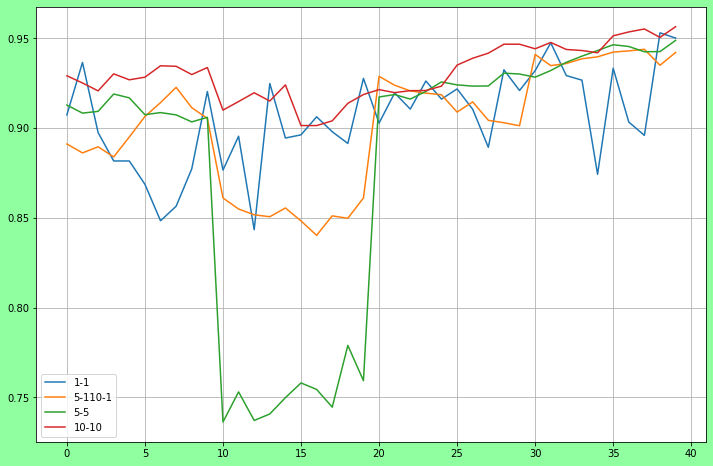

In [2]:
_ = plot_experiment("config_0")

Config: 
 {
    "iterations": 60,
    "num_arms": 4,
    "num_contexts": 10
}
Read 10 output files.


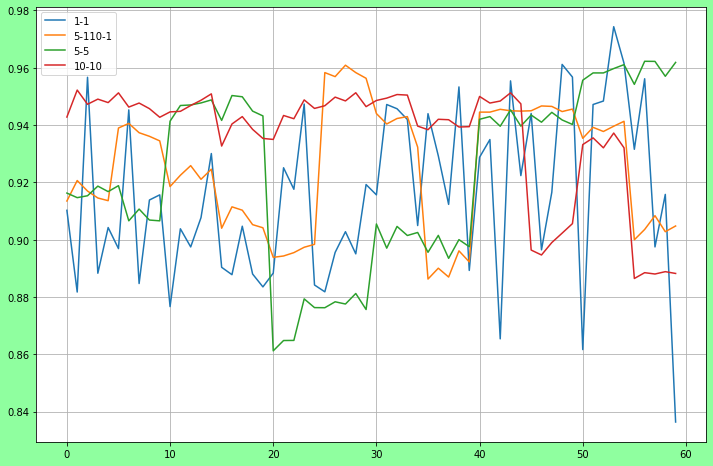

In [3]:
_ = plot_experiment("config_1")

Plotting the 10-10 setting replication by replication.

We see that even here the fit is not great.

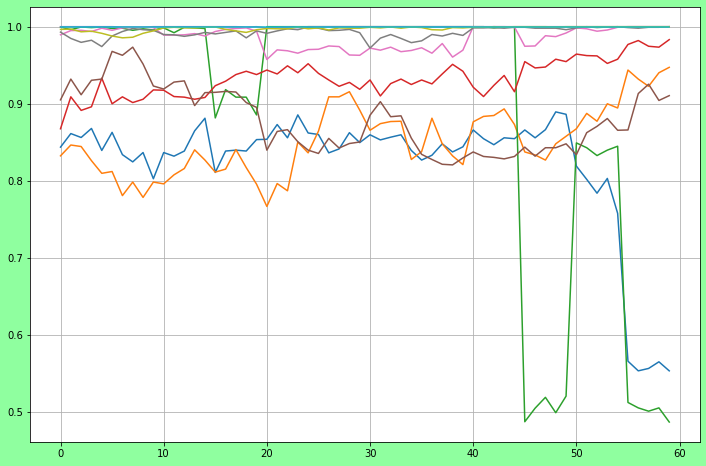

In [4]:
plot_data = _[-1]
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')
for rep in plot_data:
    plt.plot(rep)
plt.grid()
plt.show()


## Plotting empirical PCS

Config: 
 {
    "iterations": 40,
    "num_arms": 4,
    "num_contexts": 4
}
Read 10 output files.


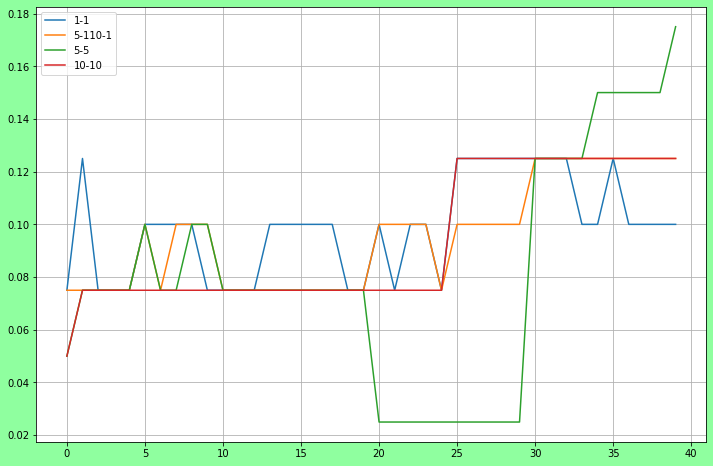

In [5]:
_ = plot_experiment("config_0", empirical_pcs=True)

Config: 
 {
    "iterations": 60,
    "num_arms": 4,
    "num_contexts": 10
}
Read 10 output files.


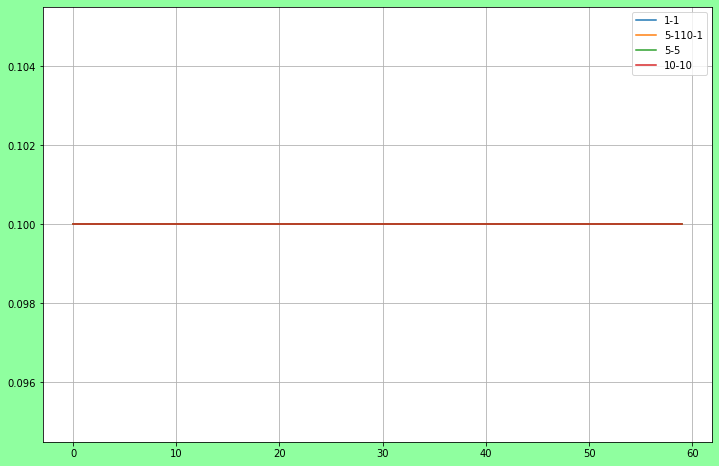

In [6]:
_ = plot_experiment("config_1", empirical_pcs=True)